In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
# Read the Excel file
file_path = '/content/MS-JUST_Data.xlsx'  # Replace with the actual path to your Excel file
df = pd.read_excel(file_path, skiprows=2)

# Drop the first column and any other columns filled with NaN values
df = df.dropna(axis=1, how='all')

# Display the first few rows of the cleaned dataframe
print(df.head())

   S.NO ARRIVAL TIME START TIME  END TIME
0     1     12:46:00   12:51:00  12:52:00
1     2     12:50:00   12:52:00  12:54:00
2     3     12:51:00   12:53:00  12:55:00
3     4     12:54:00   12:55:00  12:57:00
4     5     12:56:00   12:57:00  13:01:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Forecasted Values:
203    1083.565646
204    1087.112258
205    1090.639937
206    1094.148783
207    1097.638898
Name: predicted_mean, dtype: float64


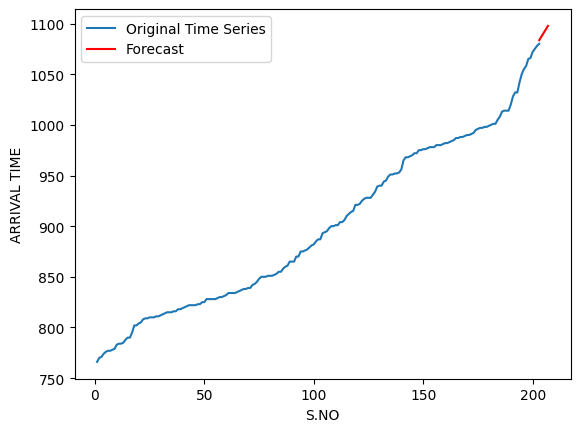

In [ ]:
# Extract the relevant columns for time series forecasting (e.g., ARRIVAL TIME) and 'S.NO'
time_series_data = df[['S.NO', 'ARRIVAL TIME']]

# Drop the first row which might still contain NaN values
time_series_data = time_series_data.dropna()

# Convert the 'ARRIVAL TIME' column to datetime format
time_series_data['ARRIVAL TIME'] = pd.to_datetime(time_series_data['ARRIVAL TIME'], format='%H:%M:%S')

# Convert the 'ARRIVAL TIME' column to a numeric format (e.g., total minutes)
time_series_data['ARRIVAL TIME'] = (
    time_series_data['ARRIVAL TIME'].dt.hour * 60 +
    time_series_data['ARRIVAL TIME'].dt.minute
)

# Set 'S.NO' as the index for time series data
time_series_data.set_index('S.NO', inplace=True)

# Fit ARIMA model
model = ARIMA(time_series_data['ARRIVAL TIME'], order=(1, 1, 1))
results = model.fit()

# Forecast the next 'n' time steps
n_steps = 5  # You can adjust this based on your needs
forecast = results.get_forecast(steps=n_steps)

# Display the forecasted values
forecast_values = forecast.predicted_mean
print("Forecasted Values:")
print(forecast_values)

# Plot the original time series data and the forecast
plt.plot(time_series_data['ARRIVAL TIME'], label='Original Time Series')
plt.plot(forecast_values.index, forecast_values.values, color='red', label='Forecast')
plt.xlabel('S.NO')
plt.ylabel('ARRIVAL TIME')
plt.legend()
plt.show()

In [ ]:
# @title Finding some key aspects of the Data
df['ARRIVAL TIME'] = pd.to_datetime('2022-01-01 ' + df['ARRIVAL TIME'].astype(str))
df['START TIME'] = pd.to_datetime('2022-01-01 ' + df['START TIME'].astype(str))
df['END TIME'] = pd.to_datetime('2022-01-01 ' + df['END TIME'].astype(str))
df['ARRIVAL HOUR'] = df['ARRIVAL TIME'].dt.hour
df['ARRIVAL MINUTE'] = df['ARRIVAL TIME'].dt.minute
df['START HOUR'] = df['START TIME'].dt.hour
df['START MINUTE'] = df['START TIME'].dt.minute
df['END HOUR'] = df['END TIME'].dt.hour
df['END MINUTE'] = df['END TIME'].dt.minute


In [ ]:
# @title Total no of Arrivals?
total_arrival_count = df.groupby(['ARRIVAL HOUR', 'ARRIVAL MINUTE']).size().sum()
formatted_total_arrival_count = "Total Arrivals for the Dataset: {}".format(total_arrival_count)
print(formatted_total_arrival_count)


Total Arrivals for the Dataset: 203


In [ ]:
# @title Maximum no of Arrivals in which time?
max_arrival_time = df.groupby(['ARRIVAL HOUR', 'ARRIVAL MINUTE']).size().idxmax()
arrival_count = df.groupby(['ARRIVAL HOUR', 'ARRIVAL MINUTE']).size().max()

formatted_max_arrival_time = "Time with Maximum Arrivals at: {:02d}:{:02d} {} ({})".format(
    max_arrival_time[0] % 12 or 12,  # Adjust for 12-hour format
    max_arrival_time[1],
    "AM" if max_arrival_time[0] < 12 else "PM",  # Determine if it's AM or PM
    arrival_count
)

print(formatted_max_arrival_time)


Time with Maximum Arrivals at: 01:48 PM (5)


In [ ]:
# @title For each time how many arrivals are there?
unique_times = df[['ARRIVAL HOUR', 'ARRIVAL MINUTE']].drop_duplicates()

for index, time in unique_times.iterrows():
    time_count = df[(df['ARRIVAL HOUR'] == time['ARRIVAL HOUR']) & (df['ARRIVAL MINUTE'] == time['ARRIVAL MINUTE'])].shape[0]

    formatted_output = "Time with Arrivals at {:02d}:{:02d} {} ({})".format(
        time['ARRIVAL HOUR'] % 12 or 12,  # Adjust for 12-hour format
        time['ARRIVAL MINUTE'],
        "AM" if time['ARRIVAL HOUR'] < 12 else "PM",  # Determine if it's AM or PM
        time_count
    )

    print(formatted_output)


Time with Arrivals at 12:46 PM (1)
Time with Arrivals at 12:50 PM (1)
Time with Arrivals at 12:51 PM (1)
Time with Arrivals at 12:54 PM (1)
Time with Arrivals at 12:56 PM (1)
Time with Arrivals at 12:57 PM (2)
Time with Arrivals at 12:58 PM (1)
Time with Arrivals at 12:59 PM (1)
Time with Arrivals at 01:03 PM (1)
Time with Arrivals at 01:04 PM (2)
Time with Arrivals at 01:05 PM (1)
Time with Arrivals at 01:08 PM (1)
Time with Arrivals at 01:10 PM (2)
Time with Arrivals at 01:15 PM (1)
Time with Arrivals at 01:22 PM (2)
Time with Arrivals at 01:24 PM (1)
Time with Arrivals at 01:25 PM (1)
Time with Arrivals at 01:28 PM (1)
Time with Arrivals at 01:29 PM (2)
Time with Arrivals at 01:30 PM (3)
Time with Arrivals at 01:31 PM (2)
Time with Arrivals at 01:32 PM (1)
Time with Arrivals at 01:33 PM (1)
Time with Arrivals at 01:34 PM (1)
Time with Arrivals at 01:35 PM (3)
Time with Arrivals at 01:36 PM (2)
Time with Arrivals at 01:38 PM (2)
Time with Arrivals at 01:39 PM (1)
Time with Arrivals a

In [ ]:
# @title Served Passengers in each Time
unique_start_times = df[['START HOUR', 'START MINUTE']].drop_duplicates()

for index, start_time in unique_start_times.iterrows():
    service_count = df[
        (df['START HOUR'] == start_time['START HOUR']) &
        (df['START MINUTE'] == start_time['START MINUTE'])
    ].shape[0]

    formatted_output = "Time with Fast Service at {:02d}:{:02d} {} ({})".format(
        start_time['START HOUR'] % 12 or 12,  # Adjust for 12-hour format
        start_time['START MINUTE'],
        "AM" if start_time['START HOUR'] < 12 else "PM",  # Determine if it's AM or PM
        service_count
    )

    print(formatted_output)


Time with Fast Service at 12:51 PM (1)
Time with Fast Service at 12:52 PM (1)
Time with Fast Service at 12:53 PM (1)
Time with Fast Service at 12:55 PM (1)
Time with Fast Service at 12:57 PM (1)
Time with Fast Service at 01:01 PM (1)
Time with Fast Service at 12:59 PM (1)
Time with Fast Service at 01:04 PM (1)
Time with Fast Service at 01:03 PM (1)
Time with Fast Service at 01:10 PM (1)
Time with Fast Service at 01:20 PM (1)
Time with Fast Service at 01:08 PM (1)
Time with Fast Service at 01:11 PM (1)
Time with Fast Service at 01:14 PM (1)
Time with Fast Service at 01:23 PM (1)
Time with Fast Service at 01:17 PM (1)
Time with Fast Service at 01:21 PM (1)
Time with Fast Service at 01:26 PM (2)
Time with Fast Service at 01:27 PM (1)
Time with Fast Service at 01:32 PM (1)
Time with Fast Service at 01:38 PM (2)
Time with Fast Service at 01:49 PM (1)
Time with Fast Service at 01:34 PM (2)
Time with Fast Service at 01:52 PM (2)
Time with Fast Service at 01:47 PM (1)
Time with Fast Service at

In [ ]:
# Assuming df is your DataFrame with the provided data
df['DATE'] = pd.to_datetime('2022-01-01')  # You can replace this with the actual date
df['ARRIVAL DATETIME'] = pd.to_datetime(df['DATE'].astype(str) + ' ' + df['ARRIVAL TIME'].astype(str))


In [ ]:
# @title Predicting Arrivals of tommorow
# Assuming df is your DataFrame with the provided data
df['DATE'] = pd.to_datetime('2022-01-01')  # You can replace this with the actual date
df['ARRIVAL DATETIME'] = pd.to_datetime(df['DATE'].astype(str) + ' ' + df['ARRIVAL TIME'].astype(str))

# Calculate daily arrival counts
daily_arrival_counts = df.groupby('DATE')['ARRIVAL TIME'].count()

# Train ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_arrival_counts, order=(1, 1, 1))  # You can adjust the order as needed
results = model.fit()

# Forecast for the next day
forecast = results.get_forecast(steps=1)
predicted_arrivals = forecast.predicted_mean
print("Predicted Arrivals for Tomorrow:", predicted_arrivals.values[0])


Predicted Arrivals for Tomorrow: 203.00000000000003


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observa

In [ ]:
# @title Predicted Total Arrivals for Tomorrow
# Convert 'ARRIVAL DATETIME' to datetime
df['ARRIVAL DATETIME'] = pd.to_datetime(df['ARRIVAL DATETIME'])

# Extract hour from 'ARRIVAL DATETIME'
df['HOUR'] = df['ARRIVAL DATETIME'].dt.hour

# Calculate average arrivals per hour

average_arrivals_per_hour = df.groupby('HOUR').size().mean()

# Assuming today's data is until the last recorded hour
last_recorded_hour = df['HOUR'].max()

# Predict total arrivals for the next day
predicted_total_arrivals = average_arrivals_per_hour * (last_recorded_hour + 1)

print("Predicted Total Arrivals for Tomorrow Between 12:00 pm to 11:59 am:", predicted_total_arrivals)

Predicted Total Arrivals for Tomorrow Between 12:00 pm to 11:59 am: 551.0


In [ ]:
# @title Predicted Total Arrivals for Tomorrow between 12:46pm to 6:20pm
# Convert 'ARRIVAL DATETIME' to datetime
df['ARRIVAL DATETIME'] = pd.to_datetime(df['ARRIVAL DATETIME'])

# Extract hour from 'ARRIVAL DATETIME'
df['HOUR'] = df['ARRIVAL DATETIME'].dt.hour

# Calculate average arrivals per hour
average_arrivals_per_hour = df.groupby('HOUR').size().mean()

# Assuming today's data is until the last recorded hour
last_recorded_hour = df['HOUR'].max()

# Limit prediction to the hours you've collected data for
prediction_hours = range(last_recorded_hour + 1, last_recorded_hour + 7)
predicted_total_arrivals = average_arrivals_per_hour * len(prediction_hours)

# Format and print the output
formatted_output = "Predicted Total Arrivals for Tomorrow between 12:46pm to 6:20pm: {:.2f}".format(predicted_total_arrivals)
print(formatted_output)


Predicted Total Arrivals for Tomorrow between 12:46pm to 6:20pm: 174.00


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Add a new column for the arrival date (today's date)
df['ARRIVAL DATE'] = pd.to_datetime('today').date()

# Add one day to get tomorrow's date
df['ARRIVAL DATE'] += pd.DateOffset(days=1)

# Combine date and time to create a new datetime column for tomorrow's arrivals
df['ARRIVAL DATETIME'] = pd.to_datetime(df['ARRIVAL DATE'].astype(str) + ' ' + df['ARRIVAL TIME'].astype(str))

# Extract hour and minute components
df['ARRIVAL HOUR'] = df['ARRIVAL DATETIME'].dt.hour
df['ARRIVAL MINUTE'] = df['ARRIVAL DATETIME'].dt.minute

# Find the time with maximum arrivals for tomorrow
max_arrival_time_tomorrow = df.groupby(['ARRIVAL HOUR', 'ARRIVAL MINUTE']).size().idxmax()
arrival_count_tomorrow = df.groupby(['ARRIVAL HOUR', 'ARRIVAL MINUTE']).size().max()

# Format and print the output
formatted_max_arrival_time_tomorrow = "Time with Maximum Arrivals Tomorrow at: {:02d}:{:02d} {} ({})".format(
    max_arrival_time_tomorrow[0] % 12 or 12,  # Adjust for 12-hour format
    max_arrival_time_tomorrow[1],
    "AM" if max_arrival_time_tomorrow[0] < 12 else "PM",  # Determine if it's AM or PM
    arrival_count_tomorrow
)

print(formatted_max_arrival_time_tomorrow)


Time with Maximum Arrivals Tomorrow at: 01:48 PM (5)
